In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def rp_dgnf(theta):
    '''
    input: arcmin
    output: mm
    '''
    return 59.2294*theta + 8.97064e-5*theta**3
def rp_dgwf(theta):
    '''
    input: arcmin
    output: mm
    '''
    return 62.96274*theta + 7.816037e-4*theta**3
def rp_cadc14(theta):
    '''
    input: arcmin
    output: mm
    '''
    return 65.02345*theta + 2.49062923e-3*theta**3
def s_dgnf(theta):
    '''
    input: arcmin
    output: mm
    '''
    return 69.062 + 0.83398047*theta**2 + 3.112125e-5*theta**4
def s_dgwf(theta):
    '''
    input: arcmin
    output: mm
    '''
    return 189.109 + 1.06287366*theta**2 + 1.5212314e-4*theta**4
def s_cadc14(theta):
    '''
    input: arcmin
    output: mm
    '''
    return 235.289 + 1.35076769*theta**2 + 2.53369431e-3*theta**4

In [4]:
print((rp_cadc14(7)+36.5)*2, rp_cadc14(7.5)*2)

985.0368716517798 977.4532184128125


In [5]:
theta = np.arange(0,10.1,0.1)

In [6]:
theta

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [7]:
(rp_dgnf(5)+93.5)/60

6.494303555

In [8]:
rp_dgnf(10)

592.3837063999999

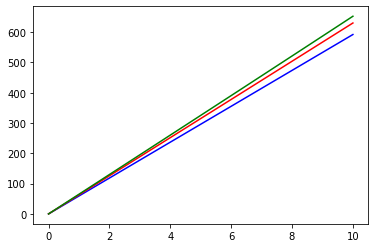

In [32]:
plt.plot(theta, rp_dgnf(theta),'-b')
plt.plot(theta, rp_dgwf(theta),'-r')
plt.plot(theta, rp_cadc14(theta),'-g')

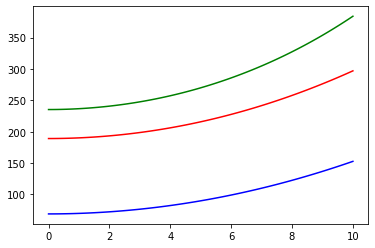

In [36]:
plt.plot(theta, s_dgnf(theta),'-b')
plt.plot(theta, s_dgwf(theta),'-r')
plt.plot(theta, s_cadc14(theta),'-g')

In [37]:
s_cadc14(7)

304.71981003369

In [10]:
np.tan(np.radians(26.35))

0.49531707746038806

In [11]:
0.707/(2-0.707)

0.5467904098994585

In [12]:
0.166*np.array([[np.sin(0.2),np.cos(0.2)],[-1,0.],[0,-1],[1,0]])*60

array([[ 1.97874653,  9.76146312],
       [-9.96      ,  0.        ],
       [ 0.        , -9.96      ],
       [ 9.96      ,  0.        ]])

In [13]:
np.rad2deg(0.2)

11.459155902616466

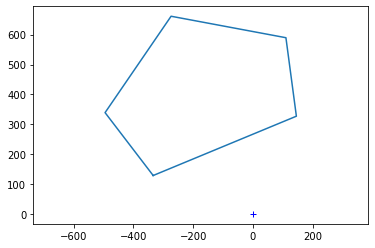

In [15]:
xy = np.loadtxt('m3_obsc.txt')
print(xy)
plt.plot(np.hstack(([xy[:,0],xy[0,0]])), np.hstack(([xy[:,1],xy[0,1]])))
plt.axis('equal')
plt.plot(0,0, "b+")

In [16]:
for i in range(5):
    print(np.sqrt(xy[i,0]**2+xy[i,1]**2))

357.8992763334399
600.0023520787231
716.153875364785
600.0054486419269
357.9014059765622


7/5/22, based on Brian's probe positioning rules document, the obscuration is a octogon, which is a 9.11 x 10.61 rectanglular area with 4 missing corners.

In [25]:
octogon_width = rp_cadc14(10.61)
octogon_height = rp_cadc14(9.11)
rectangle_width = rp_cadc14(7.50)
rectangle_height = rp_cadc14(6.0)

In [27]:
corner_side = (octogon_width- rectangle_width)/2
corner_side_y = (octogon_height- rectangle_height)/2
print(corner_side, corner_side_y)

102.07348894614574 101.78400690895239


In [28]:
f = open("gmacs_obsc.txt", "w+")
print ("{}\t{}".format(-octogon_width/2, rectangle_height/2), file=f)
print ("{}\t{}".format(-rectangle_width/2, octogon_height/2), file=f)
print ("{}\t{}".format( rectangle_width/2, octogon_height/2), file=f)
print ("{}\t{}".format( octogon_width/2, rectangle_height/2), file=f)

print ("{}\t{}".format( octogon_width/2,   -rectangle_height/2), file=f)
print ("{}\t{}".format( rectangle_width/2, -octogon_height/2), file=f)
print ("{}\t{}".format(-rectangle_width/2, -octogon_height/2), file=f)
print ("{}\t{}".format(-octogon_width/2,  -rectangle_height/2), file=f)

f.close()

[[-346.43679355  195.33933796]
 [-244.3633046   297.12334487]
 [ 244.3633046   297.12334487]
 [ 346.43679355  195.33933796]
 [ 346.43679355 -195.33933796]
 [ 244.3633046  -297.12334487]
 [-244.3633046  -297.12334487]
 [-346.43679355 -195.33933796]]


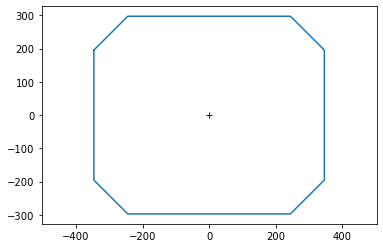

In [29]:
xy = np.loadtxt('gmacs_obsc.txt')
print(xy)
plt.plot(np.hstack(([xy[:,0],xy[0,0]])), np.hstack(([xy[:,1],xy[0,1]])))
plt.axis('equal')
plt.plot(0,0, "b+")

In [47]:
7.2/np.sqrt(2)

5.091168824543142

In [49]:
357.9/59.2294

6.0426072187123285

7/11/22, Brian: first use a 10.11 x 9.11 rectangular obscuration.

In [50]:
rectangle_width = rp_cadc14(10.11)
rectangle_height = rp_cadc14(9.11)

In [51]:
f = open("gmacs_obsc.txt", "w+")
print ("{}\t{}".format(-rectangle_width/2, rectangle_height/2), file=f)
print ("{}\t{}".format( rectangle_width/2, rectangle_height/2), file=f)

print ("{}\t{}".format( rectangle_width/2, -rectangle_height/2), file=f)
print ("{}\t{}".format(-rectangle_width/2, -rectangle_height/2), file=f)

f.close()

[[-329.98040345  297.12334487]
 [ 329.98040345  297.12334487]
 [ 329.98040345 -297.12334487]
 [-329.98040345 -297.12334487]]


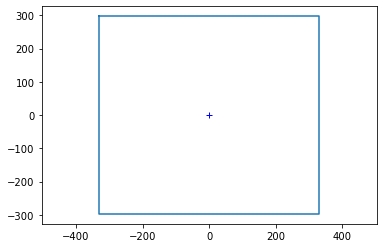

In [52]:
xy = np.loadtxt('gmacs_obsc.txt')
print(xy)
plt.plot(np.hstack(([xy[:,0],xy[0,0]])), np.hstack(([xy[:,1],xy[0,1]])))
plt.axis('equal')
plt.plot(0,0, "b+")

In [54]:
np.sqrt((10.11/2)**2 + (9.11/2)**2)

6.804487489884892

In [59]:
testpos = 60* np.transpose(np.array([0,7.2]).reshape(2,1))
testpos.shape

(1, 2)

In [61]:
import itertools

In [62]:
nstars = 1
combinations = np.array(list(itertools.combinations(range(nstars+4),4)))

In [66]:
combinations

array([[0, 1, 2, 3],
       [0, 1, 2, 4],
       [0, 1, 3, 4],
       [0, 2, 3, 4]])

In [65]:
ncomb = 4
combinations = combinations[0:ncomb,:] 

### summary results

In [17]:
dfns = pd.read_csv('output/gmacs_gs_ns.csv')
dfgl = pd.read_csv('output/gmacs_gs_glao.csv')

In [5]:
dfns.columns

Index(['Unnamed: 0', 'field No.', 'N asterisms', 'brightest faint star',
       'minradius (arcsec)'],
      dtype='object')

In [115]:
dfgl.columns

Index(['Unnamed: 0', 'field No.', 'N asterisms', 'brightest faint star',
       'minradius (arcsec)'],
      dtype='object')

In [60]:
aa = np.array(dfns['N asterisms'], dtype='float')
bins = np.arange(0, (np.ceil(max(aa)/100)+1)*100, 10)+0.5
bins = np.hstack((-2, bins))

Text(0.5, 0.6, 'NS, Sky Coverage = 95.4%')

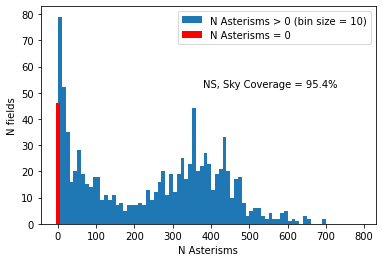

In [114]:
fig, ax = plt.subplots()
h = plt.hist(aa, bins, label='N Asterisms > 0 (bin size = 10)')
plt.bar(0, h[0][0],color='r', width=10, label='N Asterisms = 0')
plt.xlabel('N Asterisms')
plt.ylabel('N fields')
plt.legend()
plt.text(0.5, 0.6, "NS, Sky Coverage = %.1f%%"%((1000-h[0][0])/1000*100), color = 'black', transform=fig.transFigure)

In [119]:
binsize = 50
aa = np.array(dfgl['N asterisms'], dtype='float')
bins = np.arange(0, (np.ceil(max(aa)/100)+1)*100, binsize)+0.5
bins = np.hstack((-2, bins))

Text(0.5, 0.6, 'GLAO, Sky Coverage = 95.7%')

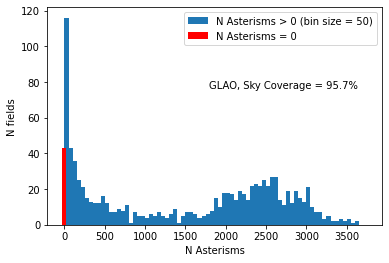

In [128]:
fig, ax = plt.subplots()
h = plt.hist(aa, bins, label=f'N Asterisms > 0 (bin size = {binsize})')
plt.bar(0, h[0][0],color='r', width=50, label='N Asterisms = 0')
plt.xlabel('N Asterisms')
plt.ylabel('N fields')
plt.legend()
plt.text(0.5, 0.6, "GLAO, Sky Coverage = %.1f%%"%((1000-h[0][0])/1000*100), color = 'black', transform=fig.transFigure)

In [130]:
np.where(aa<1)

(array([ 13,  32,  36,  76,  86, 131, 196, 248, 293, 328, 360, 368, 378,
        416, 417, 428, 445, 470, 472, 505, 545, 547, 549, 565, 602, 641,
        679, 697, 745, 780, 798, 802, 810, 814, 822, 837, 842, 862, 914,
        925, 942, 945, 997]),)

In [18]:
a=dfns['brightest faint star'].copy()

In [23]:
a[a<0.1] = 18

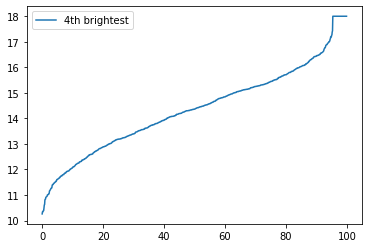

In [31]:
N = len(a)
y = np.arange(N) / float(N) *100
x = np.sort(a)
plt.plot(y, x, '-', label='4th brightest')
plt.legend();

In [34]:
10*np.log10(.7)

-1.5490195998574319

### reproduce FWN114 Figure 2

In [98]:
dffp = pd.read_csv('output/fp_gs_glao.csv')

In [99]:
aa = np.zeros((1000, 4))
for i in range(1000):
    bb = dffp['star mag'][i].split()
    try:
        if len(bb) <4:
            continue
        elif len(bb)==5:
            if len(bb[0])<5:
                bb = bb[1:]
                aa[i,0] = float(bb[0])
                aa[i,3] = float(bb[3][:-3])
            else:
                bb = bb[:4]
                aa[i,0] = float(bb[0][3:])
                aa[i,3] = float(bb[3])
        elif len(bb) ==6:
            bb = bb[1:5]
            aa[i,0] = float(bb[0])
            aa[i,3] = float(bb[3])
        elif len(bb) == 4:
            aa[i,0] = float(bb[0][3:])
            aa[i,3] = float(bb[3][:-3])
        aa[i,1] = float(bb[1])
        aa[i,2] = float(bb[2])
        #print(i, '  xxxx  ', bb, '  yyy  ', aa[i,:])
    except:
        print(i, '----', bb)

In [100]:
bb = np.sort(aa, axis=1)

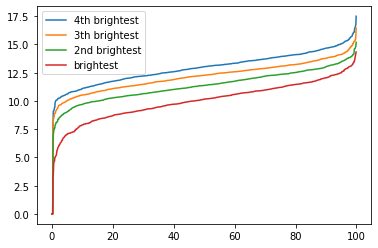

In [101]:
N = len(bb)
y = np.arange(N) / float(N) *100
plt.plot(y, np.sort(bb[:,3]), '-', label='4th brightest')
plt.plot(y, np.sort(bb[:,2]), '-', label='3th brightest')
plt.plot(y, np.sort(bb[:,1]), '-', label='2nd brightest')
plt.plot(y, np.sort(bb[:,0]), '-', label='brightest')
plt.legend();

In [84]:
np.max(aa)

16.437787

In [97]:
np.sum(aa,axis=1)

array([40.332218, 41.394839, 41.234286, 31.041274, 46.830154, 46.93825 ,
       42.83448 , 52.460147,  0.      , 45.113017, 43.490488, 45.35388 ,
       43.79069 ,  0.      , 40.744366, 41.859229, 50.013968, 46.837111,
       50.301203, 46.145963, 49.440691, 51.387329, 50.631275, 47.253703,
       51.23436 , 49.004498, 50.195671, 49.421942, 48.67223 , 43.706591,
       37.068328, 41.417934,  0.      , 36.698903, 43.951631, 53.86159 ,
       49.577789, 49.077139, 41.481752, 49.077878, 39.776756, 45.765308,
       50.497228, 44.997059, 40.056495, 49.526488, 51.189079, 50.473499,
       41.945095,  0.      , 51.992197, 43.189883, 51.870749, 50.869364,
       47.513689, 42.023346, 49.188244, 47.284223, 52.155402, 43.873949,
       41.334246, 48.679711, 49.302444, 39.403542, 44.026981, 42.631616,
       45.42101 ,  0.      , 43.674183, 43.726038, 46.013952,  0.      ,
       51.740804, 41.122709, 47.794629, 43.613749, 49.725407, 46.329255,
       38.410576, 45.846573, 46.658293, 40.317063, 

In [54]:
dffp

,Unnamed: 0,field No.,N asterisms,brightest faint star,minradius (arcsec),star mag,xpos arcsec,ypos arcsec
0,0,0,1660,10.71,406.00,['[10.658705 9.7775 10.709084 9.186929]'],['[-460.05 -495.27 -39.54 537.98]'],['[ 287.18 -6.08 -532.95 -91.43]']
1,1,1,1440,11.99,423.94,['[11.991893 6.953286 11.270722 11.178938]'],['[ 310.61 -465.83 11.93 457.8 ]'],['[ 443.95 -351.39 -445.21 -339.92]']
2,2,2,1598,10.41,396.26,['[10.407181 10.295856 10.311688 10.219561]'],['[ 296.2 -540.07 -46.29 225.33]'],['[ 473.66 59.24 -412.9 -424.88]']
3,3,3,1459,9.18,393.76,['[8.377263 8.381766 5.098359 9.183886]'],['[ 427.83 -545.79 430.06 599.22]'],['[ 277.72 -155.62 -193.04 19.55]']
4,4,4,1654,12.89,391.75,['[12.892912 11.188899 11.334885 11.413458]'],['[ 362.93 -549.58 333.45 562.61]'],['[ 356.18 -23.23 -437.6 -192.57]']
5,5,5,2276,13.15,391.73,['[ 8.847698 13.152576 12.563606 12.37437 ]'],['[-373.65 -524.42 -87.69 424.55]'],['[ 148.91 -193.1 -501.34 -373.8 ]']
6,6,6,1404,11.66,394.09,['[ 9.48278 11.378871 10.310062 11.662767]'],['[ 173.46 -501.48 -245.02 328.87]'],['[ 497.35 298.62 -336.24 -227.88]']
7,7,7,910,14.10,401.63,['[12.827595 14.100199 13.084113 12.44824 ]'],['[ 443.09 -559.04 123.91 461.55]'],['[ 340.1 133.26 -411.72 -303.87]']
8,8,8,960,11.52,392.55,[],[],[]
9,9,9,1221,12.96,403.89,['[10.027636 12.958778 11.399515 10.727088]'],['[ 433.73 -406.26 -347.98 438.58]'],['[ 350.56 14.14 -445.91 -33.86]']
